# Chapter 1 Perceptron

## Start with Signum Function

In [3]:
def signum(x):
    if x < 0:
        return -1
    else:
        return 1

Test code to try

In [4]:
print(signum(3))
print(signum(-4))

1
-1


## Compute Output of w, x

In [5]:
def compute_output(w, x):
	z = 0.0
	for i in range(len(w)):
		z += x[i] * w[i]
	return signum(z)

test compute output

In [6]:
compute_output([0.9, -0.6, -0.5], [1.0, -1.0, -1.0])
compute_output([0.9, -0.6, -0.5], [1.0, 1.0, 1.0])

-1

## Code for Perceptron Learning

In [7]:
import random

def show_learning(w):
    print('w0 = ', '%5.2f' % w[0], 'w1 = ', '%5.2f' % w[1], 'w0 = ', '%5.2f' % w[2] )


random.seed(7)
LEARNING_Rate = 0.1
index_list = [0, 1, 2, 3]

x_train = [(1.0, -1.0, -1.0), (1.0, -1.0, 1.0), (1.0, 1.0, -1.0), (1.0, 1.0, 1.0)]
y_train = [1.0, 1.0, 1.0, -1.0]

#weight
w = [0.2, -0.6, 0.25]

In [8]:
show_learning(w)

w0 =   0.20 w1 =  -0.60 w0 =   0.25


## Perceptron Training Loop Python Implementation

In [9]:
all_correct = False
while not all_correct:
    all_correct = True
    random.shuffle(index_list)
    for i in index_list:
        x = x_train[i]
        y = y_train[i]
        p_out = compute_output(w, x)

        if y != p_out:
            for j in range(0, len(w)):
                w[j] += (y * LEARNING_Rate * x[j])
            all_correct = False
            show_learning(w)
    

w0 =   0.30 w1 =  -0.50 w0 =   0.15
w0 =   0.40 w1 =  -0.40 w0 =   0.05
w0 =   0.30 w1 =  -0.50 w0 =  -0.05
w0 =   0.40 w1 =  -0.40 w0 =  -0.15


### Graph to produce showlearning

In [95]:
import matplotlib.pyplot as plt
color_list = ['r-', 'm-', 'y-', 'c-', 'b-', 'g-']
color_index = 0


def show_learning_graph(w):
    
    global color_index
    print('w0 = ', '%5.2f' % w[0], 'w1 = ', '%5.2f' % w[1], 'w2 = ', '%5.2f' % w[2] )
    
    if color_index == 0:
        plt.plot([1.0], [1.0], 'b_', markersize=12)
        plt.plot([-1.0, 1.0, -1.0], [1.0, -1.0, -1.0], 'r+', markersize=12)
        plt.axis([-2, 2, -2, 2])
        plt.xlabel('x1')
        plt.ylabel('x2')
    x = [-2.0, 2.0]

    #This is for drawing decision boundary in the graph
    if abs(w[2]) < 1e-5:
        #calculate y value using equation, but avoiding division by zero
        y = [-w[1]/(1e-5) * (-2.0)+(-w[0]/(1e-5)), -w[1]/(1e-5) * (2.0)+(-w[0]/(1e-5))]
    else:
        #calculate the y value using equation
        y = [-w[1]/w[2] * (-2.0)+(-w[0]/w[2]), -w[1]/w[2] * (2.0)+(-w[0]/w[2])]

    plt.plot(x, y, color_list[color_index])
    if color_index < (len(color_list) -1):
        color_index += 1
    


In [96]:
def test_show_learning_graph():
    random.seed(7)
    LEARNING_RATE = 0.1
    index_list = [0, 1, 2, 3]
    x_train = [(1.0, -1.0, -1.0), (1.0, -1.0, 1.0), (1.0, 1.0, -1.0), (1.0, 1.0, 1.0)]
    y_train = [1.0, 1.0, 1.0, -1.0]



    #weight 
    w = [0.2, -0.6, 0.25]
    show_learning_graph(w)
    all_correct = False
    while not all_correct:
        all_correct = True
        random.shuffle(index_list)
        for i in index_list:
            x = x_train[i]
            y = y_train[i]
            p_out = compute_output(w, x)

            if y != p_out:
                for j in range(0, len(w)):
                    w[j] += (y * LEARNING_RATE * x[j])
                
                show_learning_graph(w)
                all_correct = False
    

w0 =   0.20 w1 =  -0.60 w2 =   0.25
w0 =   0.30 w1 =  -0.50 w2 =   0.15
w0 =   0.40 w1 =  -0.40 w2 =   0.05
w0 =   0.30 w1 =  -0.50 w2 =  -0.05
w0 =   0.40 w1 =  -0.40 w2 =  -0.15


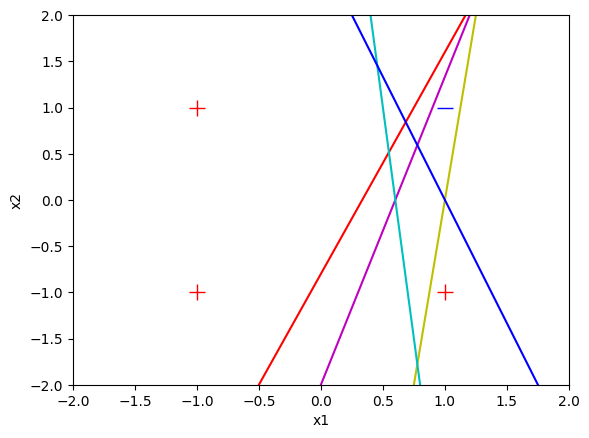

In [97]:
test_show_learning_graph()

Using numpy to write dot product

In [ ]:
import numpy as np
def compute_output_vector(w, x):
    z = np.dot(w, x)
    return np.sign(z)
print(compute_output_vector([0.9, -0.6, -0.5], [1.0, -1.0, -1.0]))
print(compute_output_vector([0.9, -0.6, -0.5], [1.0, 1.0, 1.0]))

1.0
-1.0


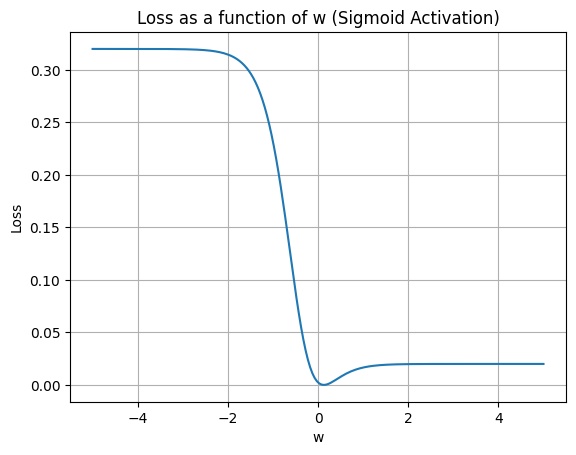

In [3]:
import torch
import matplotlib.pyplot as plt

# constants
x = torch.tensor(3.0)
b = torch.tensor(1.0)
y = torch.tensor(0.8)  # Note: sigmoid outputs only between 0 and 1, so y=4 is too large — let's adjust later

# candidate weights
w_vals = torch.linspace(-5, 5, 200)

# define sigmoid
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

# compute predictions and losses
z_vals = w_vals * x + b
a_vals = sigmoid(z_vals)
loss_vals = 0.5 * (a_vals - y)**2

# plot
plt.plot(w_vals, loss_vals)
plt.title("Loss as a function of w (Sigmoid Activation)")
plt.xlabel("w")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
